Task 1:
Handwritten Digit Recognition



In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

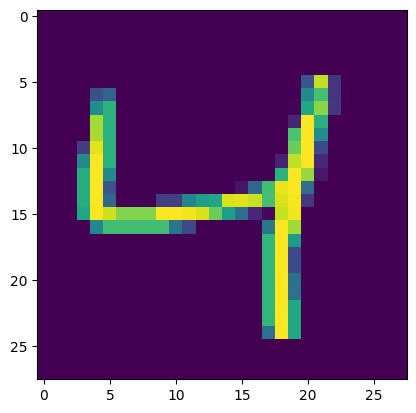

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2780 - accuracy: 0.9198 - val_loss: 0.1362 - val_accuracy: 0.9623
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1167 - accuracy: 0.9651 - val_loss: 0.1099 - val_accuracy: 0.9657
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0778 - accuracy: 0.9763 - val_loss: 0.1000 - val_accuracy: 0.9688
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9816 - val_loss: 0.0926 - val_accuracy: 0.9722
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0999 - val_accuracy: 0.9716
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.1003 - val_accuracy: 0.9728
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.1051 - val_accuracy:

In [ ]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[2.2476176e-09, 8.6259427e-10, 2.4608534e-07, ..., 9.9999422e-01,
        8.3384938e-10, 5.1745819e-06],
       [6.7314818e-15, 8.2225291e-08, 9.9999982e-01, ..., 2.2331672e-15,
        7.4492773e-12, 1.8857330e-20],
       [3.2380482e-10, 9.9997085e-01, 1.0677966e-07, ..., 2.1945692e-05,
        1.3175800e-07, 1.7004007e-08],
       ...,
       [1.1292727e-16, 4.5267102e-13, 2.3453876e-16, ..., 2.4812773e-11,
        8.6080806e-13, 2.7202349e-09],
       [9.9803087e-13, 3.0219151e-17, 3.8556600e-19, ..., 3.1493831e-12,
        2.0940010e-07, 1.9365055e-14],
       [3.2395014e-10, 7.7752697e-13, 5.2262483e-12, ..., 1.9268047e-18,
        5.7440719e-16, 5.9984570e-18]], dtype=float32)

In [ ]:
y_prob=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_pred=y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9746

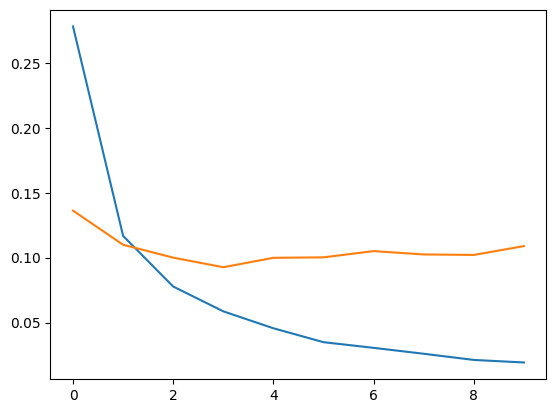

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

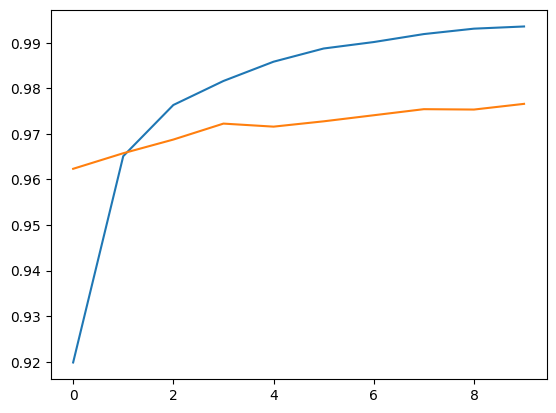

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

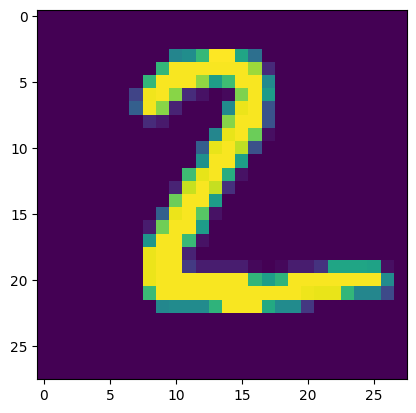

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 37ms/step


array([2])